In [1]:
# Integration of individual time points in Zebrafish scRNA-seq
#This notebook performs zebrafish caudal fin regeneration single-cell RNA-seq data.
#Series GSE261907-GEO omnibus

In [ ]:
# This notebook integrates results from preprocessing of individual time points that were generated.
# Note that the files to be uploaded are in h5ad format. Here we are just merging the data from individual time points and creating a visual summary.

In [1]:
import scanpy as sc
from pathlib import Path

# Mapping of time points to h5ad files (use your compressed files if you made them)
TIME_POINTS = {
    '0dpa': '0_DPA.h5ad',
    '1dpa': '1_DPA.h5ad',
    '2dpa': '2_DPA.h5ad',
    '4dpa': '4_DPA.h5ad',
    '6dpa': '6_DPA.h5ad'
}

for time_point, file_name in TIME_POINTS.items():
    if not Path(file_name).is_file():
        print(f"❌ File not found: {file_name}")
        continue
    
    print(f"\n📂 Loading {time_point} from {file_name}...")
    adata = sc.read(file_name)  # Load the file safely
    
    # Show basic info
    print(f"✔️ {adata.n_obs} cells | {adata.n_vars} genes")
    
    # Add time point info to AnnData object(if not added previously)
    adata.obs['time_point'] = time_point
    
    # Save updated file with time point info (compressed for lighter storage)
    compressed_file = f"{time_point}_compiled.h5ad"
    adata.write(compressed_file, compression="gzip")
    print(f"💾 Saved: {compressed_file}")
    
    # Free up memory immediately after saving
    del adata

print("\n✅ Finished loading & saving all files.")



📂 Loading 0dpa from 0_DPA.h5ad...
✔️ 7054 cells | 3645 genes
💾 Saved: 0dpa_compiled.h5ad

📂 Loading 1dpa from 1_DPA.h5ad...
✔️ 13669 cells | 2713 genes
💾 Saved: 1dpa_compiled.h5ad

📂 Loading 2dpa from 2_DPA.h5ad...
✔️ 14846 cells | 3268 genes
💾 Saved: 2dpa_compiled.h5ad

📂 Loading 4dpa from 4_DPA.h5ad...
✔️ 13506 cells | 4004 genes
💾 Saved: 4dpa_compiled.h5ad

📂 Loading 6dpa from 6_DPA.h5ad...
✔️ 8519 cells | 1787 genes
💾 Saved: 6dpa_compiled.h5ad

✅ Finished loading & saving all files.


In [3]:
import scanpy as sc

# List of your compressed, annotated files
compiled_files = [
    '0dpa_compiled.h5ad',
    '1dpa_compiled.h5ad',
    '2dpa_compiled.h5ad',
    '4dpa_compiled.h5ad',
    '6dpa_compiled.h5ad'
]

# Load and merge safely
adatas = []
for file in compiled_files:
    print(f"📂 Reading {file}")
    adata = sc.read(file)
    adatas.append(adata)

print("\n🔗 Merging all time points...")
merged_adata = adatas[0].concatenate(adatas[1:], join='outer', batch_key='time_point_batch')

print(f"✅ Merged dataset: {merged_adata.n_obs} cells | {merged_adata.n_vars} genes")

# Fix: convert all .var columns to strings (safe for saving)
for col in merged_adata.var.columns:
    merged_adata.var[col] = merged_adata.var[col].astype(str)
    
# Save merged data (compressed)
merged_adata.write("merged_regeneration_data.h5ad", compression="gzip")
print("💾 Saved merged file: merged_regeneration_data.h5ad")


📂 Reading 0dpa_compiled.h5ad
📂 Reading 1dpa_compiled.h5ad
📂 Reading 2dpa_compiled.h5ad
📂 Reading 4dpa_compiled.h5ad
📂 Reading 6dpa_compiled.h5ad

🔗 Merging all time points...


C:\Users\uer\AppData\Local\Temp\ipykernel_32884\2235193639.py:20: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  merged_adata = adatas[0].concatenate(adatas[1:], join='outer', batch_key='time_point_batch')


✅ Merged dataset: 57594 cells | 8907 genes
💾 Saved merged file: merged_regeneration_data.h5ad


In [5]:
# =============================================
# 📂 Load Merged Dataset for Zebrafish Fin Regeneration
# =============================================
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

# Load merged dataset
adata = sc.read("merged_regeneration_data.h5ad")
print(f"✅ Loaded merged dataset: {adata.n_obs} cells | {adata.n_vars} genes")

# =============================================
# 📊 Quick Quality Control Summary
# =============================================

# 1. Show cell counts per time point
print("\n🔬 Cell counts per time point:")
print(adata.obs['time_point'].value_counts().to_string())

# 2. Show summary stats: genes per cell and UMIs per cell
adata.obs['n_genes'] = (adata.X > 0).sum(axis=1).A1  # Genes per cell
adata.obs['n_counts'] = adata.X.sum(axis=1).A1      # UMIs per cell

print(f"\n📊 Dataset-wide Summary:")
print(f"• Median genes per cell: {int(np.median(adata.obs['n_genes']))}")
print(f"• Median UMIs per cell: {int(np.median(adata.obs['n_counts']))}")


✅ Loaded merged dataset: 57594 cells | 8907 genes

🔬 Cell counts per time point:
time_point
2dpa    14846
1dpa    13669
4dpa    13506
6dpa     8519
0dpa     7054

📊 Dataset-wide Summary:
• Median genes per cell: 25
• Median UMIs per cell: 40


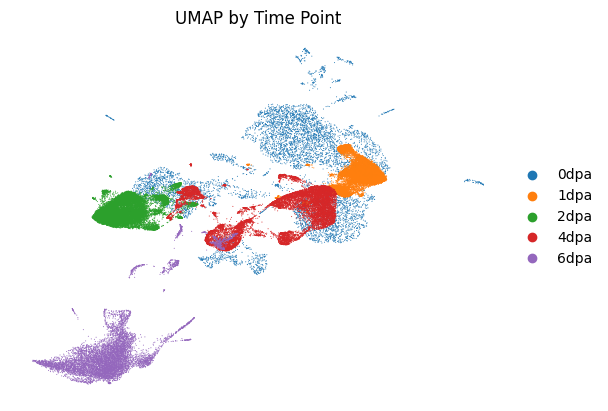


✅ QC summary & plots completed.


In [6]:
# =============================================
# 🎨 Visualization: Cell Distribution by Time Point
# =============================================

# Plot UMAP if available (optional)
if 'X_umap' in adata.obsm.keys():
    sc.pl.umap(adata, color='time_point', title="UMAP by Time Point", frameon=False)
else:
    # Bar plot of cells per time point
    adata.obs['time_point'].value_counts().plot(kind='bar')
    plt.title("Cell Counts per Time Point")
    plt.xlabel("Time Point")
    plt.ylabel("Number of Cells")
    plt.tight_layout()
    plt.show()

print("\n✅ QC summary & plots completed.")

